Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

Data Collection and Processing

In [3]:
#loading the data
df = pd.read_csv("C:/Users/shrut/OneDrive/Desktop/car data (1).csv")

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#checkig the no of missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#some statistical info
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#checking the distribution of categorical data
print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [12]:
print(df.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [13]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


encoding the data into numerical
if petrol =0
if diesel =1
if cng = 2
if dealer=0
if individual = 1
if Manual =0      
if Automatic=1

In [15]:
df.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1 , 'CNG':2}} , inplace=True)
df.replace({'Seller_Type':{'Dealer':0 , 'Individual':1 }} , inplace=True)
df.replace({'Transmission':{'Manual':0 , 'Automatic':1 }} , inplace=True)

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data 

In [20]:
x= df.drop(['Car_Name' ,'Selling_Price'] , axis=1 )
y = df['Selling_Price' ]

In [21]:
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting Training and Testing data

In [26]:
x_train , x_test , y_train , y_test=train_test_split(x , y , test_size=0.1 , random_state=2 )

In [27]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((270, 7), (31, 7), (270,), (31,))

Model Training
1.Linear Regression

In [29]:
#loading the linear regression model
algo = LinearRegression()

In [30]:
algo.fit(x_train , y_train)

LinearRegression()

In [36]:
y_test_predict=algo.predict(x_test)

In [41]:
y_train_predict=algo.predict(x_train)

Text(0, 0.5, 'y_train_prediction')

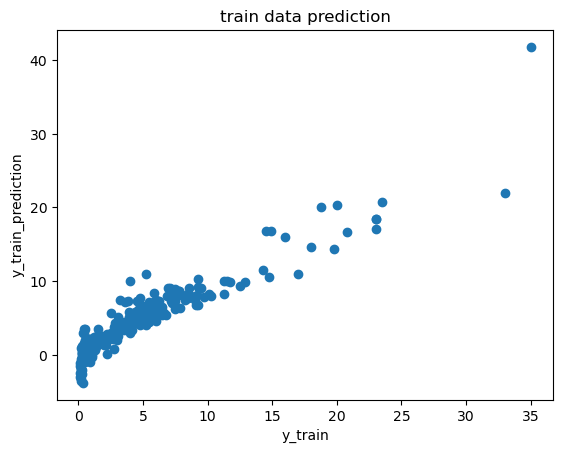

In [44]:
plt.scatter(y_train , y_train_predict)
plt.title("train data prediction")
plt.xlabel("y_train")
plt.ylabel("y_train_prediction")

Text(0, 0.5, 'y_test_prediction')

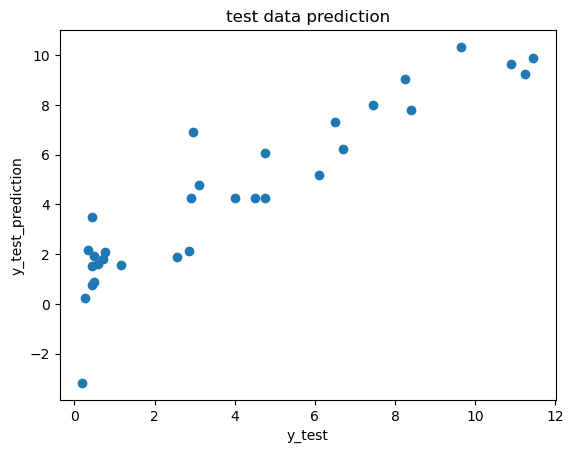

In [46]:
plt.scatter(y_test , y_test_predict)
plt.title("test data prediction")
plt.xlabel("y_test")
plt.ylabel("y_test_prediction")

Finding score

In [50]:
train_score=algo.score(x_train , y_train)
print("Score on Training data : " , train_score)

Score on Training data :  0.8799451660493716


In [49]:
test_score=algo.score(x_test , y_test)
print("Score on Test data : " , test_score)

Score on Test data :  0.8365766715027156


Model Training
2.Lasso Regression

In [52]:
#loading the lasso regression model
algo2 = Lasso()

In [53]:
algo2.fit(x_train , y_train)

Lasso()

In [58]:
y_test_prediction=algo2.predict(x_test)

In [59]:
y_train_prediction=algo2.predict(x_train)

Text(0, 0.5, 'y_train_prediction')

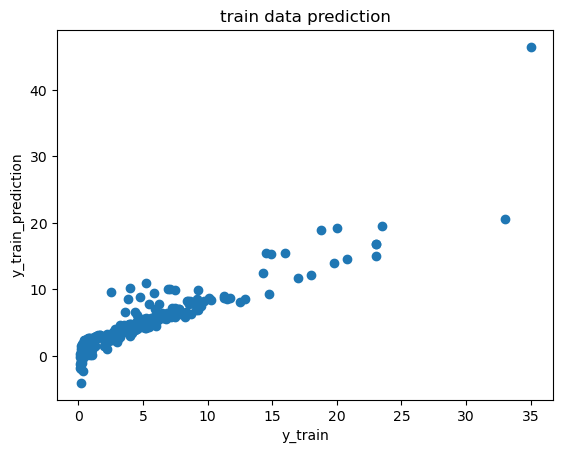

In [60]:
plt.scatter(y_train , y_train_prediction)
plt.title("train data prediction")
plt.xlabel("y_train")
plt.ylabel("y_train_prediction")

Text(0, 0.5, 'y_test_prediction')

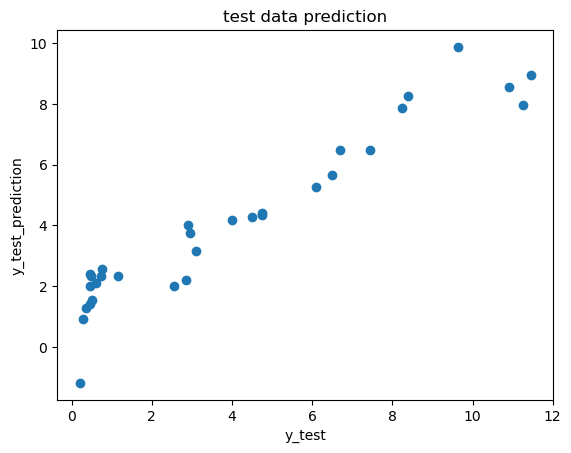

In [61]:
plt.scatter(y_test , y_test_prediction)
plt.title("test data prediction")
plt.xlabel("y_test")
plt.ylabel("y_test_prediction")

In [62]:
train_score=algo2.score(x_train , y_train)
print("Score on Training data : " , train_score)

Score on Training data :  0.8427856123435794


In [63]:
test_score=algo2.score(x_test , y_test)
print("Score on Test data : " , test_score)

Score on Test data :  0.8709167941173195
